In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine

In [4]:

# Data Loading
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['quality'] = data.target  # Wine quality labels

In [5]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64

In [6]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64

In [7]:
# Data Inspection
print("dimensions")
print(df.shape)
print("Dataset Information:")
print(df.info())
print("Dataset Summary:")
print(df.describe())
print("Class Distribution:")
print(df['quality'].value_counts())



dimensions
(178, 14)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline               

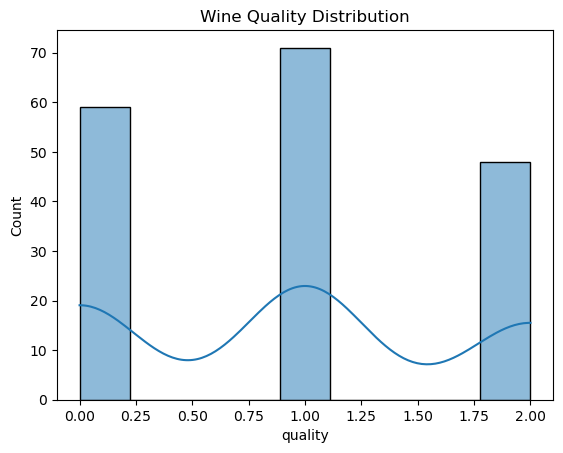

In [8]:
# Visualization
sns.histplot(df['quality'], kde=True)
plt.title("Wine Quality Distribution")
plt.show()


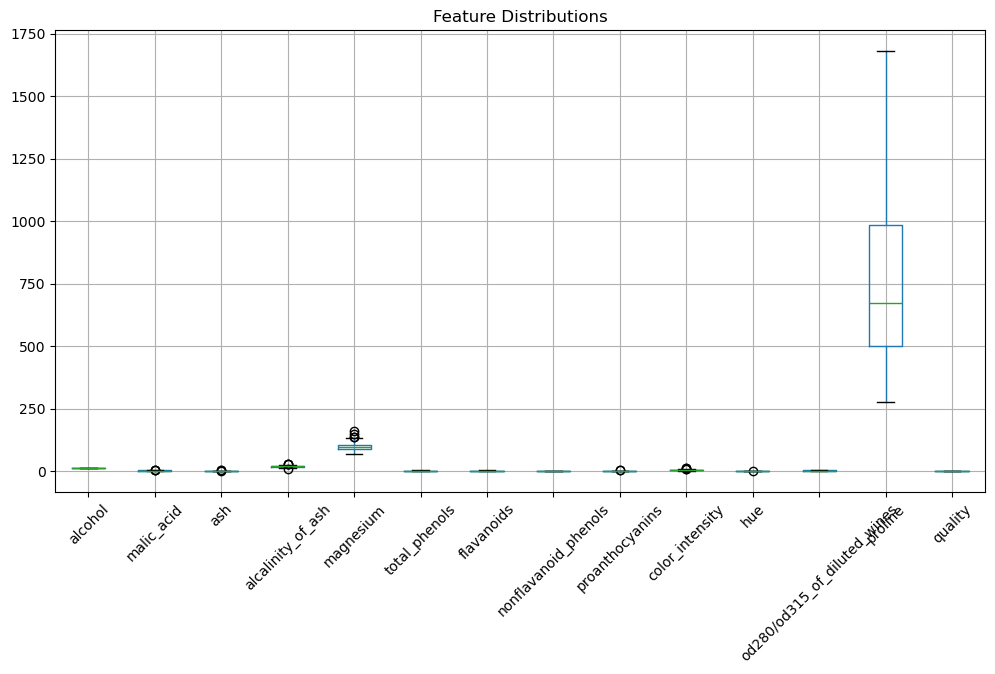

In [9]:
# Boxplot for each feature
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Feature Distributions")
plt.show()

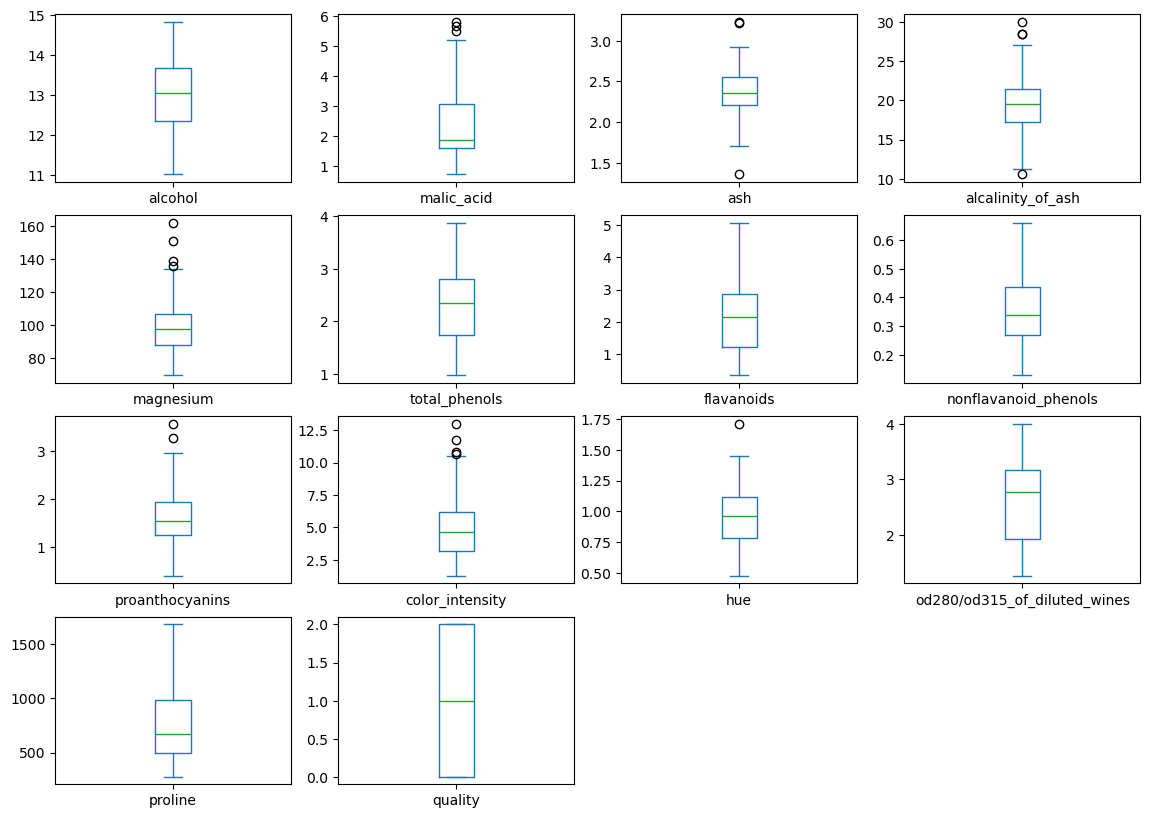

In [10]:

# Box plots for individual features
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 10))
plt.show()

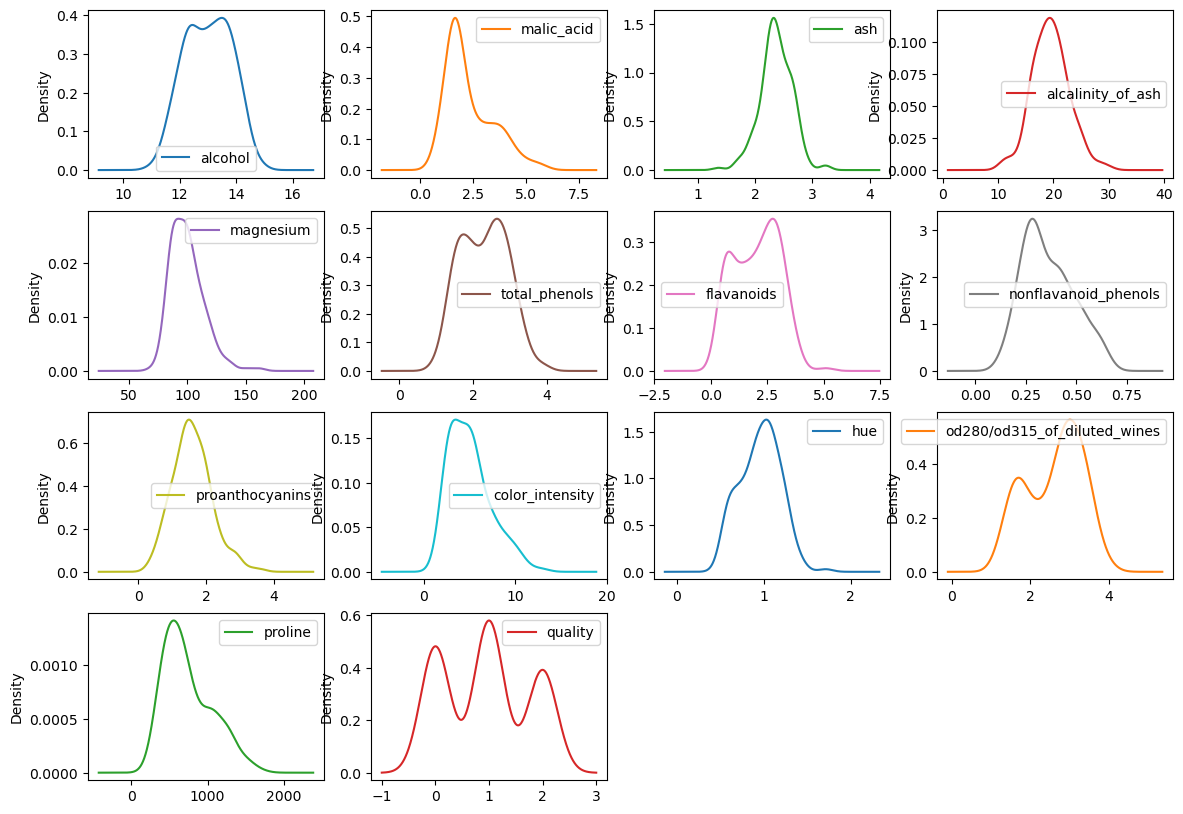

In [11]:
# Density plots for individual features
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 10))
plt.show()

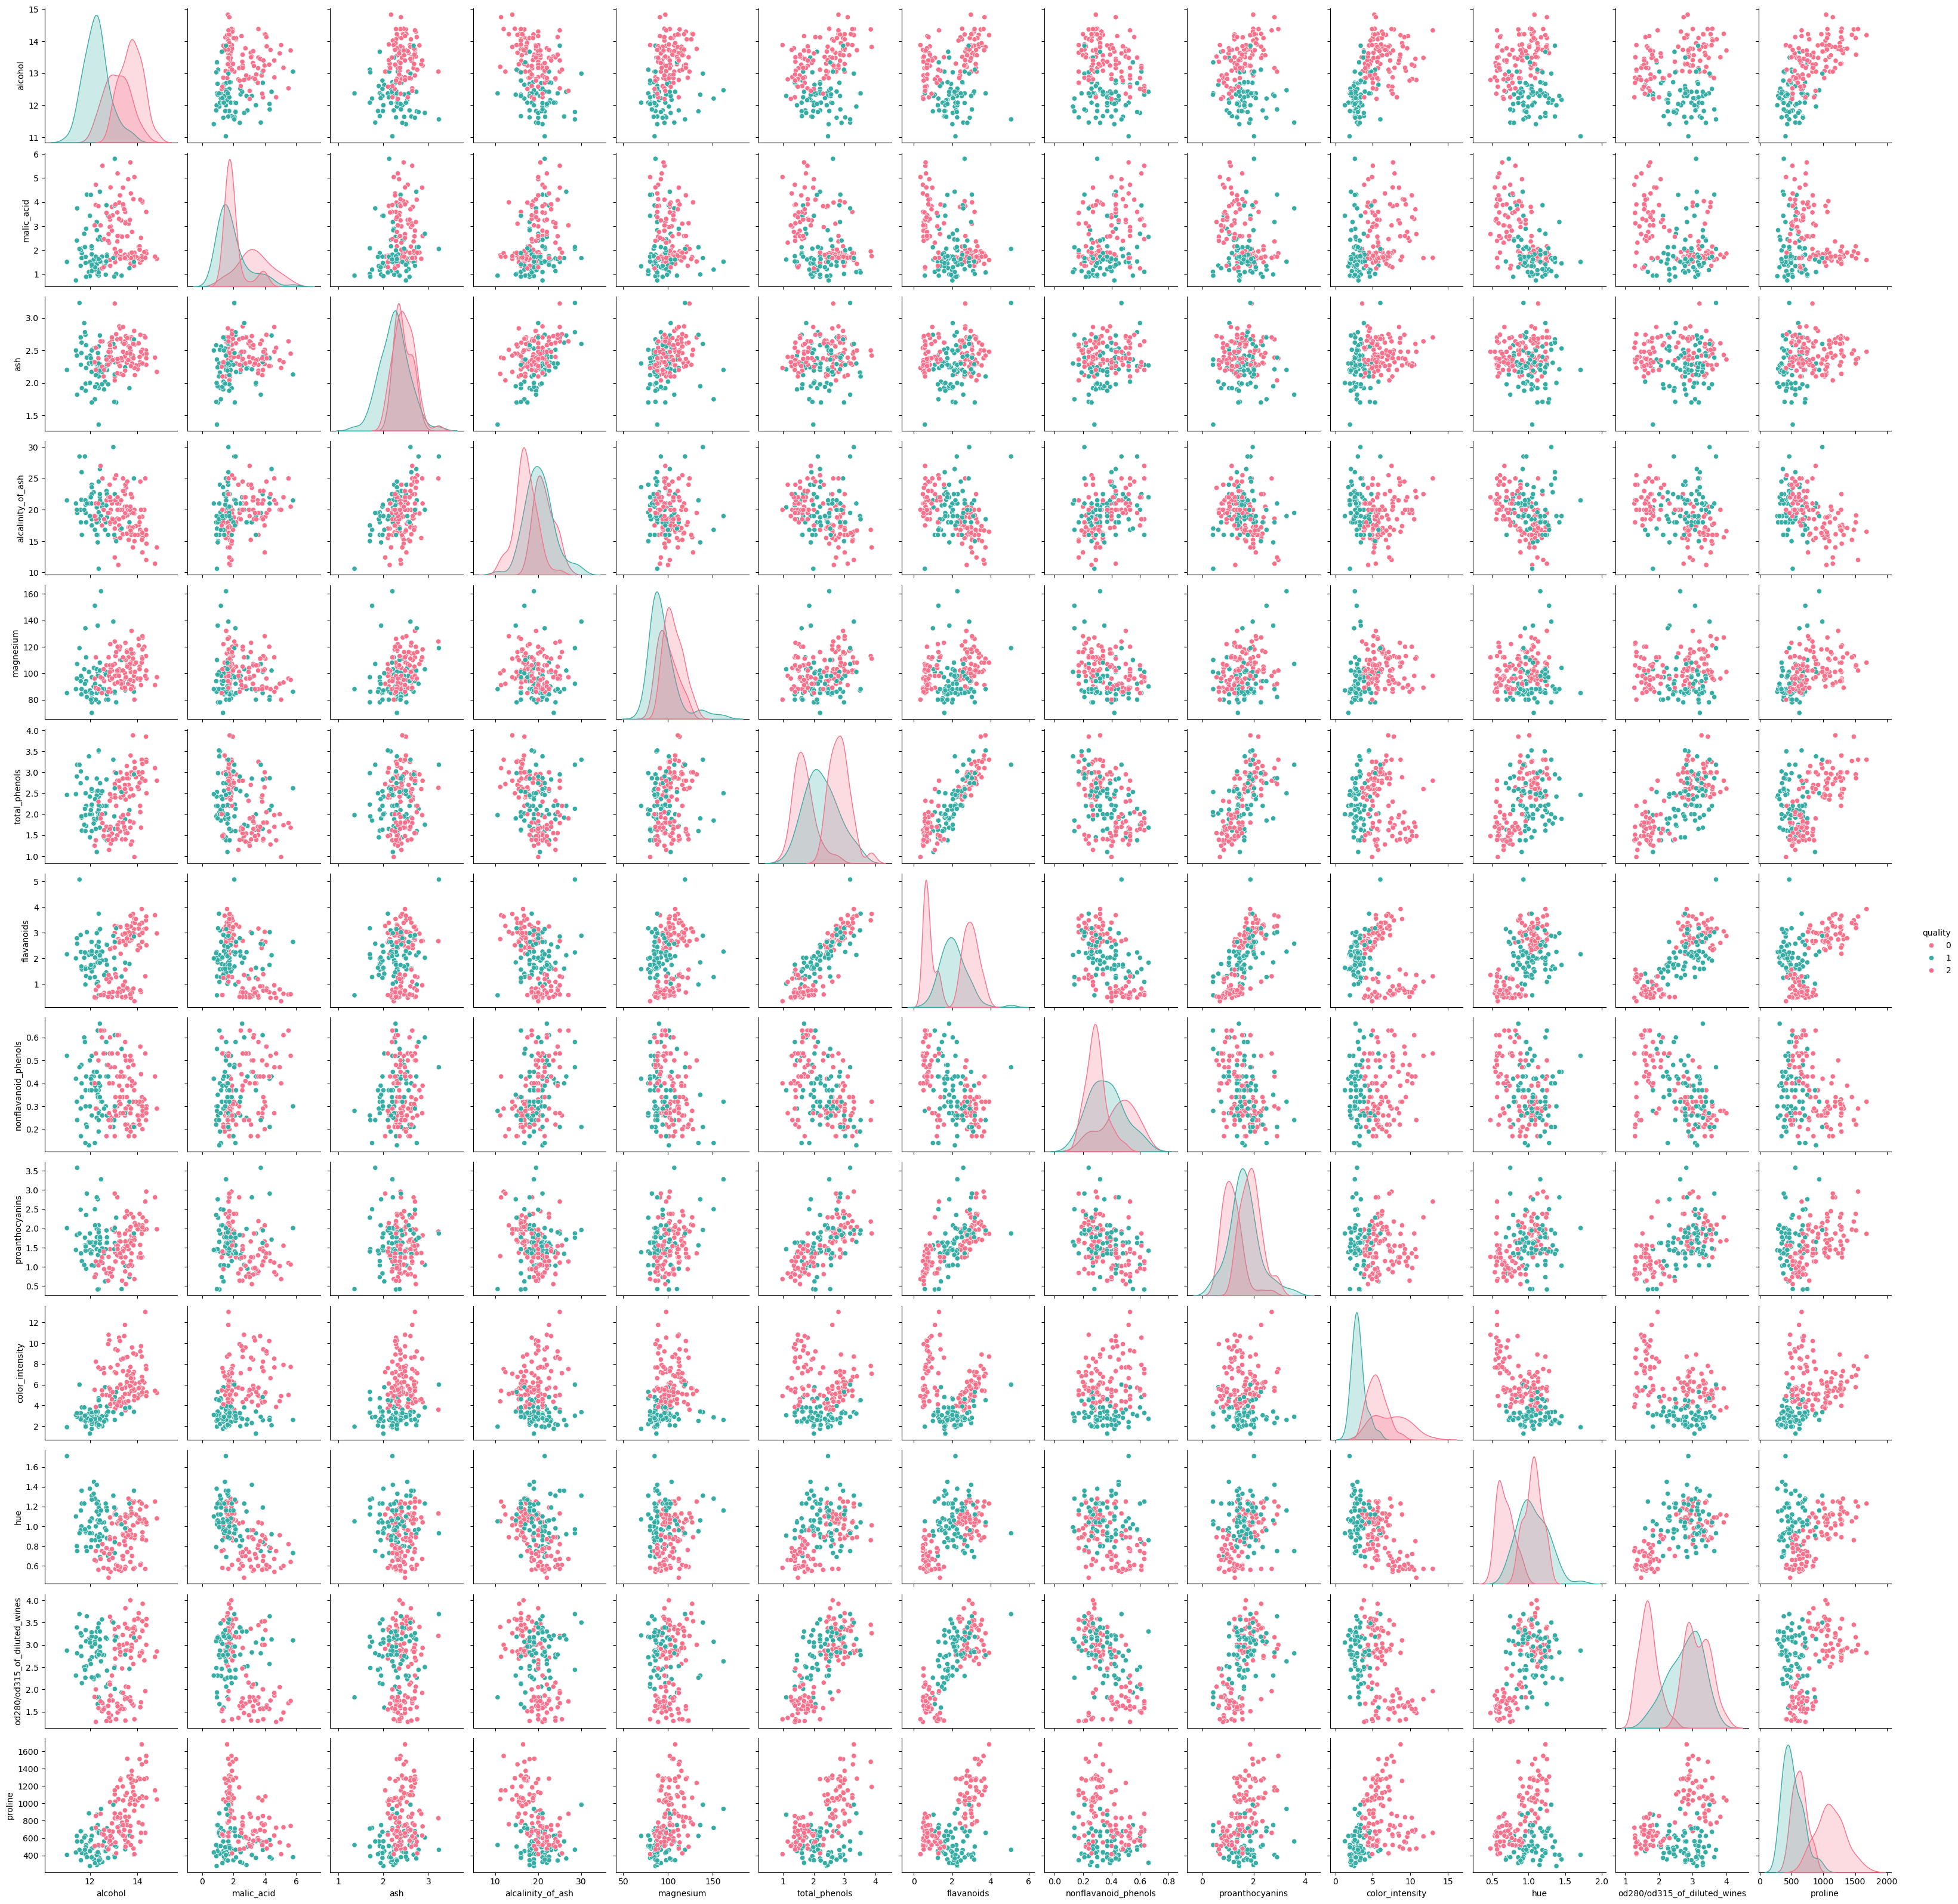

In [12]:
sns.pairplot(df, hue="quality", palette="husl")
plt.show()

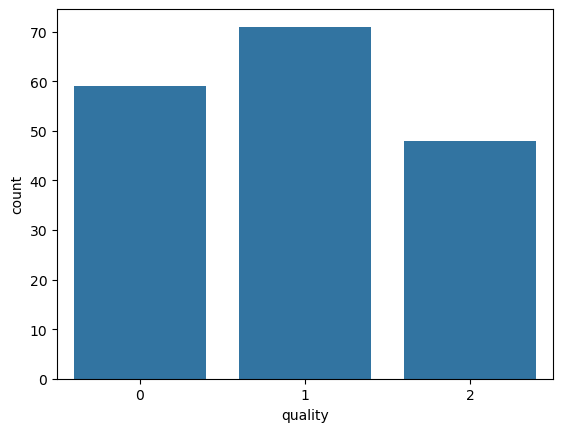

In [13]:

# Bar charts for quality labels distribution
sns.countplot(x='quality', data=df)
plt.show()

In [14]:

# Handle missing values (if any)
df.dropna(inplace=True)

In [15]:
# Standardization
scaler = StandardScaler()
X = df.drop(columns=['quality'])
y = df['quality']
X_scaled = scaler.fit_transform(X)

In [16]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Initialize baseline models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Train the models on the training data
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# List of models
models = [log_reg, decision_tree, knn]
model_names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']

# Evaluate each model
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Evaluation:")
    print(f"prediction: {y_pred}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Logistic Regression Model Evaluation:
prediction: [0 1 0 1 1 0 0 1 1 2 1 2 0 2 0 1 1 0 1 0 1 1 0 0 1 1 0 2 1 2 0 2 1 2 2 2]
Accuracy: 0.9722222222222222
Precision: 0.974074074074074
Recall: 0.9722222222222222
F1-Score: 0.9719701552732407
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]

Decision Tree Model Evaluation:
prediction: [0 2 0 1 1 0 0 1 1 2 1 2 0 2 0 1 1 0 1 1 1 1 0 0 1 1 0 2 1 2 0 2 1 2 2 2]
Accuracy: 0.9722222222222222
Precision: 0.974074074074074
Recall: 0.9722222222222222
F1-Score: 0.972097284690988
Confusion Matrix:
[[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]

K-Nearest Neighbors Model Evaluation:
prediction: [0 2 0 1 1 0 0 1 1 2 1 2 0 2 0 1 1 0 1 0 1 1 0 0 1 1 0 2 2 2 0 2 1 2 2 2]
Accuracy: 0.9722222222222222
Precision: 0.9747474747474748
Recall: 0.9722222222222222
F1-Score: 0.9723691945914168
Confusion Matrix:
[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_log_reg = {'C': [0.1, 1.0, 10.0, 100.0]}

# Initialize Grid Search
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters for Logistic Regression: {grid_search_log_reg.best_params_}")
best_log_reg = grid_search_log_reg.best_estimator_

Best Parameters for Logistic Regression: {'C': 0.1}


In [20]:
# Define the parameter grid for Decision Tree
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Initialize Grid Search
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters for Decision Tree: {grid_search_decision_tree.best_params_}")
best_decision_tree = grid_search_decision_tree.best_estimator_

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


In [21]:
# Define the parameter grid for K-Nearest Neighbors
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# Initialize Grid Search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters for K-Nearest Neighbors: {grid_search_knn.best_params_}")
best_knn = grid_search_knn.best_estimator_

Best Parameters for K-Nearest Neighbors: {'n_neighbors': 9}


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# List of best models
best_models = [best_log_reg, best_decision_tree, best_knn]
best_model_names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']

# Evaluate each best-tuned model
for model, name in zip(best_models, best_model_names):
    y_pred = model.predict(X_test)
    print(f"\n{name} Best Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Logistic Regression Best Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]

Decision Tree Best Model Evaluation:
Accuracy: 0.9444444444444444
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444
Confusion Matrix:
[[11  1  0]
 [ 1 13  0]
 [ 0  0 10]]

K-Nearest Neighbors Best Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
